##### Módulo 2: Regresión Lineal

## Introducción

Un modelo de regressión es un modelo que describe la relacion entre dos, o más, variables. Especificamente como una(s) de esta(s) variables, denominadas **variables independientes**, influyen en las variaciones de otra variable, denominada **variable dependiente**.

Supongamos que queremos encontrar un modelo de regresión que nos permita estimar cual es el precio por metro cuadrado de una vivienda usando como variable observable la edad de la misma. Para poder construir este modelo necesitamos de un conjunto de datos historicos que relacionen el precio de la vivienda e indiquen su área. Para este ejemplo utilizaremos la base de datos 
*Residential Building Data Set*, la cual puede ser encontrada en el UCI repository en este [link](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set). Empecemos por cargar y observar los datos.

In [1]:
# Importando algunas librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Cargando el archivo de Excel con los datos
data = pd.read_excel('Real estate valuation data set.xlsx')
data.shape

(414, 8)

In [3]:
# Observando los datos
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.666667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.666667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.416667,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500000,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.416667,17.9,1783.18000,3,24.96731,121.51486,22.1


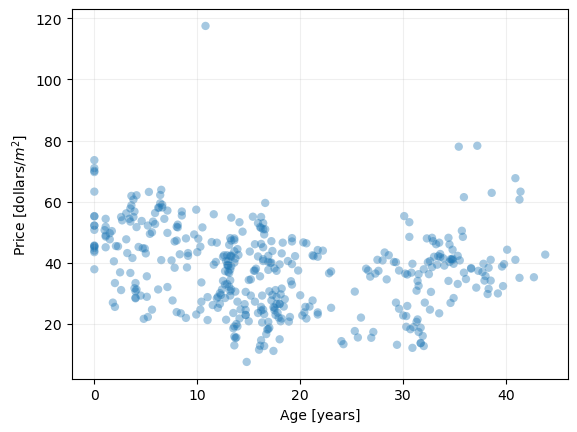

In [4]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'],alpha=0.4,edgecolor='none')
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')
plt.grid(visible=True,alpha=0.2)

## Regresión Lineal Simple

vamos a suponer que el modelo que queremos encontrar es un modelo lineal de la forma $h_{\boldsymbol{\theta}}(x) = \theta_0+\theta_1x$. Donde $x$ representa la variable independiente, que en este caso sería la antiguedad de la vivienda, y $h_{\boldsymbol{\theta}}(x)$ es el modelo (o hipotesis) que depende de los paramétros $\boldsymbol\theta:\{\theta_0,\theta_1\}$. Este modelo se puede interpretar como una función que mapea los datos de entrada $x$ a valores en $y$. En este caso $y$ es la variable dependiente, y representa el precio por $\text{m}^2$ de la vivienda. El problema ahora radica en encontrar los valores  de los parámetros $\boldsymbol\theta$ que de acuerdo a una metrica dada son capaces de realizar predicciones acertadas.

Antes de continuar definamos cierta nomenclatura para poder guiarnos a lo largo de la clase:

1. los escalares seran representados por medio de variables tal como $x$ y $y$
2. El número de observaciones que se tienen se denominara $m$
3. $(x^{(i)},y^{(i)})$ representa la $i$-ésima observación.

## Función de Costo

La idea general para solucionar el problema de regresión planteado en la sección anterior, es: encontrar los parámetros $\boldsymbol\theta$ tal que $h_{\boldsymbol{\theta}}(x)$ produce valores cercanos a $y$ para el conjunto de entrenamiento $(x^{(i)},y^{(i)})$.

<div class="alert alert-block alert-success">
<b>Pregunta:</b> Dado un valor de entrada $x$, ¿Cómo puedo medir que tan cercano de $y$ son los valores que obtengo con $h_{\boldsymbol{\theta(x)}}$?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> Existen muchas formas de medir esta distancia, se puede usar la distancia eculídea, u otro tipo de métrica que me permita medir distancias. Sin embargo, una de las más utilzadas es el <em>´´error cuadratico medio (Mean Least Squares)``</em>.
</div>

### Error Cuadratico Medio

En nuestro problema de regresión el error cuadrático medio se define como:

$$e_{LS}(\boldsymbol{\theta})=\frac{1}{m}\sum_{i=1}^{m}[h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}]^2.$$

Una **función de costo** es una función que me indica cual es el costo en el cual incurre el modelo por seleccionar un conjunto de parametros $\boldsymbol\theta$. La función de costo para nuestro problema de regression será el error cuadratico medio. Tradicionalmente la función de costo se expresa con la letra $J$. De esta forma el problema de regresión se enfoca en encontrar el conjunto de parametros $\boldsymbol\theta$ que minimiza la función de costo, o en otras palabras se debe solucionar:

$$ \begin{equation}
   \begin{split}
      \min_{\theta_{0},\theta_{1}}  & \quad J(\theta_{0},\theta_{1}) \\
      s.t.  & \quad J(\boldsymbol{\theta}) = \frac{1}{m}\sum_{i=1}^{m}\left[h_{\boldsymbol{\theta}}(x^{(i)})-y^{(i)}\right]^2,\\
            & \quad h_{\boldsymbol{\theta}}(x) = \theta_{0}+\theta_{1}x
   \end{split}
   \end{equation}$$

<div class="alert alert-block alert-warning">
<em>Explicación de la intuición alrededor de la función de costo usando un solo parámetro en el modelo</em> (Tablero virtual, ejemplo $y = x$)
</div>

### ¿Cómo luce la función de costo con múltiple variables?

En este caso nuestra función de costo es convexa, lo cual implica que podemos encontrar un mínimo global, la forma de está función de costo es un paraboloide, como se muestra en la siguiente figura.

![title](img/Cost_Contour.png)

Ahora tratemos de ubicar cual es el valor de la función de costo para diferentes parámetros, así mismo como la salida respectiva del modelo para cada conjunto de parámetros.

![title](img/Cost_Contour_Test.png)

<div class="alert alert-block alert-success">
<b>Pregunta:</b> Suponga que para diferentes combinaciones de parámetros ${\theta_0, \theta_1}$ al ubicar el costo este se encuentran sobre el mismo contorno, ¿Qué podemos conlcuir?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> Si esto sucede, esto significa que para todas estas combinaciones de parámetros el error de predicción del modelo es el mismo. Es decir, esas combinaciones de parámetros producen el mismo costo.
</div>

## Aprendizaje de los Parámetros

En esta sección estudiaremos dos formas para poder _"aprender"_ cuales son los parámetros óptimos de nuestro modelo de regresión lineal. El pimer método es _algebraico_ y el segundo método es un algoritmo de búsqueda utilizando técnicas de optimización.

### Soluciones de Forma Canónica

El problema de regresión lineal planteado en este ejercicio posee una solución canónica (cerrada). Esto se debe a la forma de la superficie de error (Función de costo). Antes de continuar, para poder entender la relación entre el problema y el Álgebra lineal extendamos un poco la notación que hemos usado hasta el momento:

1. Todos los vectores que trabajaremos son vectores columna y se representaran por letras minusculas en negrita.
2. El vector $\mathbf{x}=[x^{(1)},\ldots,x^{(m)}]^{\text{T}}$ es un vector que contiene todas las $m$ observaciones de la variable independiente. Este vector esta embebido en un espacio $m$-dimensional, es decir $\mathbf{x}\in\mathbb{R}^m$.
2. El vector $\mathbf{y}=[y^{(1)},\ldots,y^{(m)}]^{\text{T}}$ es un vector que contiene todas las observaciones de la variable dependiente, y $\mathbf{y}\in\mathbb{R}^m$.
3. El vector $\mathbf{1}_m$ es un vector columna con $m$ elementos, y todos sus elementos son unos, y $\mathbf{1}_m\in\mathbb{R}^m$
4. Las matrices se representan por medio de letras mayusculas en negrita.


Con la notación que hemos definido ahora podemos tratar de convertir todas nuestras ecuaciones en forma matricial.

<div class="alert alert-block alert-success">
<b>Pregunta:</b> Nuestro modelo esta definido por $h_\boldsymbol\theta(x^{(i)}) = \theta_1x^{(i)}+\theta_0$. Este modelo produce por cada valor de $x$ un valor de salida. Utilizando vectores, es posible escribir esta ecuación de tal forma que se pueda encontrar la salida del modelo para varios valores $x$ en una sola operación. Plantee como quedaria este modelo utilizando producto de matrices y vectores.
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> El modelo en forma matricial queda expresado como $\mathbf{h_\boldsymbol\theta}=[\mathbf{x} \quad \mathbf{1}]\boldsymbol{\theta}$, donde $\boldsymbol{\theta}=[\theta_1 \quad \theta_0]^{\text{T}}$, $\boldsymbol\theta\in\mathbb{R}^2$. Simplificando un poco más el modelo se puede definir $\mathbf{A} = [\mathbf{x} \quad \mathbf{1}]$ como la matriz de regresores, las dimensiones de esta matriz son $(m\times2)$, es decir $\mathbf{A}\in\mathbb{R}^{m\times2}$. De esta forma el modelo se simplifica a $\mathbf{h_\theta}=\mathbf{A}\boldsymbol{\theta}$.
</div>

<div class="alert alert-block alert-success">
<b>Pregunta:</b> ¿Como se define la función de costo de forma matricial?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b>  antes de definir la funcion de costo, definamos el error de estimación $\mathbf{e}=\mathbf{A}\boldsymbol{\theta}-\mathbf{y}$, donde $\mathbf{e}\in\mathbb{R}^m$. De esta forma la función de costo estaría dada por $J(\boldsymbol{\theta}) = \frac{1}{m}\mathbf{e}^\text{T}\mathbf{e}$, donde $\text{T}$ representa la transpuesta.
</div>

#### Entendiendo la función de costo

El objetivo de la función de costo del error cuadratico medio es minimizar la magnitud del error de aproximación. Ese error esta dado por las distancias calculadas entre la predicción del modelo y las observaciones. En la siguiente gráfica se presenta de forma más intuitiva este error.

![title](img/Error_Regresion.png)

Si consideramos que el error esta embebido en un espacio $m$-dimensional, entonces cada uno de los $m$ puntos de la función de error representa el valor que debe tomar en cada una de las coordenadas de ese espacio. Por lo tanto, si quiero calcular la magnitud del error, utilizo el producto punto, ya que $\|\mathbf{e}\|_2^2=\mathbf{e}^\text{T}\mathbf{e}$.

Por otro lado, si despejamos la variable independiente de la ecuación del error obtenemos la siguiente expresion $\mathbf{y} = \mathbf{A}\boldsymbol{\theta}+\mathbf{e}$. esta ecuación nos indica que el vector $\mathbf{y}$ se obtiene de la suma de dos vectores, uno que se encuentra embebido en el espacio de columnas de la matrix de regresores y que se calcula como $\mathbf{A}\boldsymbol{\theta}$, y otro que es el vector del error $\mathbf{e}$. Debido a que queremos minimizar el error tenemos que encontrar los parámetros $\boldsymbol\theta$ que produzcan el error de menor magnitud posible. El vector del error de magnitud más pequeña que se puede encontrar y que conecte al vector $\mathbf{A}\boldsymbol{\theta}$ con el vector $\mathbf{y}$, es el vector que es perpendicular al espacio de columnas de $\mathbf{A}$. Es decir, al utilizar como función de costo el error cuadratico medio (la magnitud del vector de error) lo que estamos haciendo es encontrar la combinacion de parámetros $\boldsymbol{\theta}$ que producen la proyección ortogonal de $\mathbf{y}$ sobre el espacio de columnas de $\mathbf{A}$.

<div class="alert alert-block alert-warning">
<em>Realizar la explicación de forma gráfica en el tablero virtual</em>
</div>

![title](img/Proyection.png)

### Minimizando la función de costo

Ahora procedamos a minimizar la función de costo y encontrar la solución canónica a nuestro problema de regresión.

<div class="alert alert-block alert-success">
<b>Pregunta:</b> si mi función de costo esta dada por $J(\boldsymbol{\theta})=\frac{1}{m}\mathbf{e}^\text{T}\mathbf{e}$, con $\mathbf{e}=\mathbf{y}-\mathbf{A}\boldsymbol{\theta}$ ¿Cuál es el valor de $\boldsymbol\theta$ que minimiza esa función de costo?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> <em>(Realizar la derivación en el tablero digital)</em> La solución debe dar $\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{-1}\mathbf{A}\mathbf{y}$. En la práctica, para evitar errores númericos debido al mal acondicionamiento de matrices (cercanas a matrices singulares), se utiliza la pseudo-inversa, en lugar de la inversa. La pseudo-inversa de la matrix $\mathbf{A}$ se define como $\mathbf{A}^+$. De esa forma la solución esta dada por $\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{+}\mathbf{A}^T*\mathbf{y}$.
</div>

## Regresión en la práctica

Ahora vamos a aplicar está solución a nuestro ejemplo base.

In [5]:
ones = np.ones((len(data),1))
x = data['X2 house age']
y = data['Y house price of unit area']
A = np.column_stack((x**2,x,ones))

theta = np.matmul(np.matmul(np.linalg.pinv(np.matmul(np.transpose(A),A)),np.transpose(A)),y)
print(theta)

[ 4.21809158e-02 -1.92887695e+00  5.34505390e+01]


In [6]:
theta = np.linalg.pinv(A.T@A)@A.T@y
print(theta)

[ 4.21809158e-02 -1.92887695e+00  5.34505390e+01]


Graficando los resultados del modelo

In [7]:
h = np.matmul(A,theta)

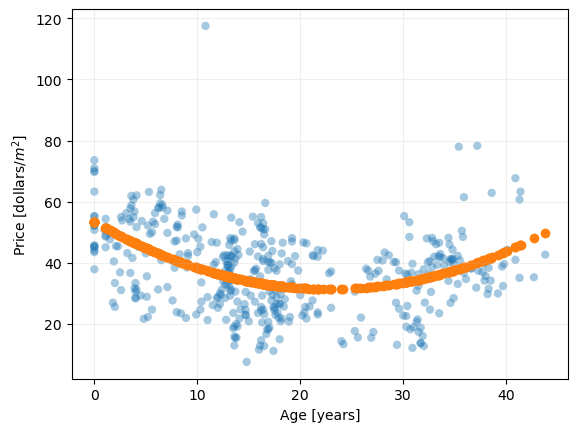

In [8]:
# Graficando las variables de interes
plt.scatter(data['X2 house age'], data['Y house price of unit area'],alpha=0.4,edgecolor='none')
plt.xlabel('Age [years]')
plt.ylabel('Price [dollars/$m^2$]')
plt.scatter(x,h)
plt.grid(visible=True,alpha=0.2)

<div class="alert alert-block alert-danger">
<b>FUNCIONA!!!</b>
</div>

<div class="alert alert-block alert-success">
<b>Pregunta:</b> ¿Qué problemas presenta la solución canonica?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> Existen dos grandes restricciones:

1. La solución canonica requiere calcular la inversa de una matrix cuadrada de dimension $n\times n$, con $n$ el número de columnas de la matrix de regresores, lo cual es una operación del orden $\mathcal{O}(n^3)$. Por lo tanto, cuando se tienen muchos regresores, este problema tardaría mucho tiempo en resolverse y requeriria muchos recursos computacionales (memoria). Los sistemas de computo actuales pueden resolver inversas de matrices del orden $10.000 \times 10.000$ en un tiempo razonable. Sin embargo si esto aumenta, el problema se vuelve cada vez más dificil de solucionar con los recursos computacionales actuales.

2. Esta solución canónica solamente funciona para encontrar el mínimo de la función de costo de error cuadratico medio y funciones afines. Por lo cual sería interesante encontrar un método que permita encontrar los parámetros de una función de costo más compleja, independiente de la forma de esta función.

</div>

## Gradiente Descendiente

Debido a las limitaciones que puede tener la solución canonica del problema de regresión lineal, surge la necesidad de crear un algoritmo que se pueda utilizar independientemente si se tienen muchos regresores, o si la superficie de la función de costo no es convexa. El algoritmo mas sencillo y popular que hace esta tarea es gradiente descendiente.

La idea general de los algortimos de optimización es la siguiente:
1. Inicializar los parámetros $\{\theta_0,\theta_1\}$
2. Continuar cambiando los parametros para reducir la función de costo $J(\theta_0,\theta_1)$ hasta que converga a un valor mínimo (Se llegue a un valor mínimo o se estabilice la reducción en la función de costo).

<div class="alert alert-block alert-warning">
<b>Nota:</b> Este procedimiento aplica también para funciones de costo que dependan de muchas más variables.
</div>

![item](img/Grad_Desc.jpeg)

Es importante observar que dependiendo de la forma de la superficie de la función de costo, es posible que al inicializar el algoritmo para unos paramétros diferentes la unción converja a otro minimo local.

<div class="alert alert-block alert-success">
<b>Pregunta:</b> ¿En qué dirección debo desplazar los parámetros para lograr que la función de costo disminuya?, en otras palabras ¿Cómo debo cambiar los parámetros para que la función de costo disminuya?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> En la dirección contraria al gradiente de la función de costo. 
</div>

![item](img/Grad_Desc_LC.png)

Como se puede observar, la idea es actualizar los pesos en dirección contraria al gradiente de la función. Esto se expresa de la siguiente forma:

$$\theta_j := \theta_{j-1}-\alpha \frac{\partial}{\partial\theta_j}J(\boldsymbol{\theta}) $$

Donde $\boldsymbol{\theta} = [\theta_0 \: \theta_1]$, $\alpha$ se denomina la taza de aprendizaje (o la constante de aprendizaje) y siempre $\alpha>0$. El símbolo $:=$ representa una asignación.

<div class="alert alert-block alert-warning">
Es importante tener en cuenta que al realizar este procedimiento, las asignaciones se hagan todas de una sola vez, o que primero se calculen todos los valores de actualización y después se haga la asignación. Esto sucede porque la función de costo depende de todos los parametros, y si actualizamos uno de ellos y lo usamos para actualizar el siguiente, entonces nos estamos moviendo en la superficie de la función de costos y ya el valor del gradiente no es el mismo.
</div>

#### Intuición alrededor de Gradient Descent

Supongamos que se tiene una función de costo que depende de una sola variable $\theta_1$. Entonces la ecuación de actualización del parámetro esta dada por:

$$\theta_1 := \theta_1-\alpha\frac{d}{d\theta_1}J(\theta_1)$$

<div class="alert alert-block alert-success">
<b>Pregunta:</b> ¿Supongamos que nuestra funcion de costo es una parabola, ¿Explique como funciona gradient descent si al inicializar $\theta_1$ nos ubicamos a la izquierda o a la derecha del minimo?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> Independientemente de donde este ubicado el parámetro inicial siempre se actualizará en la dirección donde el minimo esta ubicado.
</div>

![title](img/GD_izq.png)
![title](img/GD_der.png)

<div class="alert alert-block alert-success">
<b>Pregunta:</b>¿Cúal es el efecto de la taza de aprendizaje en el algortimo?¿Qué sucede si es muy grande o si es muy pequeña?¿Cómo se define muy grande o muy pequeño?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> La gráfica de abajo explica la primera y la segunda pregunta. Con respecto a la tercer pregunta, depende de los datos, la varianza de los datos de entrada influencia la derivada y está a su vez afecta el paso de actualización. Note que aunque la taza de aprendizaje se deje fija, si su valor es el adecuado el algoritmo va a converger al mínimo.
</div>

![title](img/LearningRateEffect.png)

<div class="alert alert-block alert-success">
<b>Pregunta:</b> La siguiente figura muestra la evolución de la función de costo a medida que se actualizan los valores de los parámettros. Explique porque se le relaciona a cada curva la condición determinada de la taza de aprendizaje.
</div>


<div class="alert alert-block alert-warning">
<b>Nota:</b> La absisa de la figura representa las epocas y no el parámetro que cambia, esta es una gráfica de Función de costo _vs_ época. Una época se refiere a una actalización completa de todos los paramétros del modelo utilizando todos los datos de entrenamiento.
</div>

![item](img/Cost_Ephocs.png)


<div class="alert alert-block alert-info">
<b>Solución:</b> Revizar lo que sucede en las gráficas de la pregunta anterior.
</div>

<div class="alert alert-block alert-success">
<b>Pregunta:</b> ¿qué pasa si el parámetro se inicaliza en un mínimo de la función de costo?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> El valor del parámetro no cambia, ya ha llegado al mínimo.
</div>

### Ecuaciones de Gradient Descent para Regresión Lineal

Para calcular las ecuaciones del gradiente descendiente debemos saber cual es el valor del gradiente de la función de costo. La función de costo esta definida por:

$$\frac{\partial}{\partial\theta_j}J(\theta_0,\theta_1) = \frac{\partial}{\partial\theta_j}\frac{1}{2m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]^2,$$

el número 2 que se inserta ayuda a simplificar una constante que aparece más adelante. Teniendo en cuenta que $h_\theta(x^{(i)}) = \theta_0+\theta_1x^{(i)}$, entonces las respectivas derivadas son:

$$ \begin{equation}
   \begin{split}
      \theta_0 &=& \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]\\
      \theta_1 &=& \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x^{(i)}
   \end{split}
   \end{equation}$$

De la actualización se puede observar lo siguiente:
1. La actualización para $\theta_0$ trata de hacer que el error tenga media cero, entonces corrige por el offset que ocasiona este parametro.
2. La actualización para $\theta_1$ trata de corregir la pendiente, de tal forma que el valor medio de corrección por la pendiente sea cero.

<div class="alert alert-block alert-warning">
<b>Nota:</b> Este algoritmo de gradiente descendiente se conoce como <b>Stochocastic</b> Gradient descent (<b>SGD</b>), ya que usa una muestra a la vez para actualizar los parámetros $\theta_i$, generalmente esta muestra se selecciona de forma aleatoria. Si se usa la versión matricial, donde todos los datos de entrenamiento actualizan los parámetros, entonces se conoce como <b>BATCH</b> Gradiente Descent (<b>BGD</b>), esto significa que usa todo el conjunto de datos de entrenamiento para realizar la actualización. Algunos algoritmos usan solo un subconjunto de los datos de entrenamiento para su actualización, esos son versiones modificadas del gradient descent.
</div>

## Regresión Lineal Multivariable

En esta sección trataremos el caso cuando tenemos varios regresores (variables independientes). Para poder continuar adicionaremos algunas definiciones a la nomenclatura:

1. m es el número de observaciones (ejemplos de entrenamiento)
2. n es el número de caracterisicas (regresores)
3. $x_j^{(i)}$ es el valor de la caracteristica (regresor) $j$ en la $i$-ésima observación.
4. $\mathbf{x}^{(i)}$ es el vector de caracteristicas (regresores) de la $i-$ésima observación, y $\mathbf{x} \in \mathbb{R}^n$.
5. $\boldsymbol{\theta}$ es un vector columna con $n+1$, $\boldsymbol{\theta} \in \mathbb{R}^{n+1}$. (El $+1$ proviene del vector de unos que acompaña a $\theta_0$).

Ahora nuestro modelo contiene $n$ regresores y es de la forma:

$$h_\theta(x)= \theta_0+\theta_1x_1+\ldots+\theta_nx_n.$$

Lo cual se puede representar de forma vectorial como:

$$\mathbf{h_\theta(x)}= \boldsymbol{\theta}^{\text{T}}\mathbf{x}.$$

### Solución Canonica para Regresión Lineal multivariable

La solución para la regresión lineal múltivariable tiene la misma forma que la solución encontrada anteriormente. La única diferencia es que la matrix de regresores ahora esta formada por $\mathbf{A} = [\mathbf1_m \: \mathbf{X}]$, donde $\mathbf{X} = [\mathbf{x}^{(1)}\: \ldots\: \mathbf{x}^{(m)}]^\text{T}$.

De esta forma la solución sigue estando dada por:
$$\boldsymbol{\hat\theta}=\left(\mathbf{A}^\text{T}\mathbf{A}\right)^{+}\mathbf{A}\mathbf{y}.$$

Con $\boldsymbol{\hat\theta} \in \mathbb{R}^{n+1}$.

### Gradiente Descendiente para Regresión Lineal multivariable

Siguiendo el mismo análisis anterior, las ecuaciones de actualización par alos parámetros utilizando gradiente descendiente son:

$$ \begin{equation}
   \begin{split}
      \theta_0 &= \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_0^{(i)}\\
      \theta_1 &= \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_1^{(i)}\\
      &  \vdots\\
      \theta_n &= \frac{1}{m}\sum_{i=1}^{m}\left[h_\theta(x^{(i)})-y^{(i)}\right]x_n^{(i)}\\
   \end{split}
   \end{equation}$$
   
Donde $x_0^{(i)}= 1$ para todo $i$.

<div class="alert alert-block alert-success">
<b>Pregunta:</b> ¿Cómo quedaría la actualización de forma matricial?
</div>

<div class="alert alert-block alert-info">
<b>Solución:</b> $$\boldsymbol\theta[j+1]=\boldsymbol\theta[j]-\frac{1}{m}\mathbf{X}^{\text{T}}\left(\mathbf{h}_{\boldsymbol\theta}-\mathbf{y}\right).$$
</div>

<div class="alert alert-block alert-danger"> 

## TAREA

Realicé una implementación en python del algoritmo de gradiente descendiente. Esta implementación debe solucionar el problema de regresión que se trabajo en clase (archivo de excel). Se debe tener en cuenta lo siguiente:

1. Debe realizar la implementación en un notebook de jupyter.
2. La implementación debe ser interactiva. Es decir yo deberia poder modificar la taza de aprendizaje por medio de un elemento de interacción, para esto estudie la libreria _ipywidgets_.
3. Se debe hacer una gráfica de la función de costo a medida que se actualizan los parámetros, de tal forma que se pueda observar como cambia la función de costo, cuando se utiliza diferentes tasas de aprendizaje.
4. Realice la implementación para que funcione para regresión multivariable.

Esta tarea de be entregarse de forma individual antes del Domingo 27 de Agosto del 2023 a las 11:59 p.m.

</div>

<div class="alert alert-block alert-warning"> 

Desarrolle el programa de forma funcional. Es decir, cree funciones pequeñas que realicen cosas especificas. Para este programa deben realizar los siguientes programas:

1. Uno que reciba de entrada los parámetros $\boldsymbol\theta$ y la matriz de entrada $\mathbf{A}$, y calcule como salida $\mathbf{h}_{\boldsymbol\theta}$
2. Un programa que reciba como entrada los parámetros $\boldsymbol\theta$, la salida del modelo $\mathbf{h}_{\boldsymbol\theta}$ y la salida esperada $\mathbf{y}$, y produzca como salida el valor de la función de costo $J$.
3. Un porgrama que calcule la derivada de la funcióm de costo, recibe como entrada los parámetros $\boldsymbol\theta$, la salida del modelo $\mathbf{h}_{\boldsymbol\theta}$ y la salida esperada $\mathbf{y}$, y produce como salida el gradiente $\nabla_{\boldsymbol\theta}J=\left[\frac{\partial J}{\partial_{\theta_0}} \quad \frac{\partial J}{\partial_{\theta_0}} \quad \ldots \quad \frac{\partial J}{\partial_{\theta_n}}\right]^{\text{T}}$.
4. Un programa que realice la actualización de los datos, recibe como entraba $\boldsymbol\theta[j]$, la tasa de aprendizaje $\eta$, la matriz de entrada $\mathbf{A}$ la salida del modelo $\mathbf{h}_{\boldsymbol\theta}$ y la salida esperada $\mathbf{y}$, y produzca como salida los parámetros actualizados $\boldsymbol\theta[j+1]$.

</div>